# Bahar Mahdavi - Homework-2-1

Consider the following dataset:

**A)** Assume the discriminative function as $y=x$ . Try to show data points of two classes using different colors.
Now use the following methods as your discriminative function:
> -  Bayesian and naive bayes
> -  Linear regression using MSE($l_2$ norm) and MAE($l_1$ norm) as your cost function
> -  Logestic Regression
> -  SVM
> - Perceptron

In [120]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_A = np.array([[2, 1], [4, 3], [3, 2], [6, 5], [5, 4], [5, 2], [6, 3],
                [1, 2], [3, 4], [2, 3], [5, 6], [4, 5], [2, 5], [3, 6], ])
y_A = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
clf = LinearDiscriminantAnalysis()
clf.fit(X_A, y_A)

LinearDiscriminantAnalysis()

In [33]:
print(clf.predict(X_A))

[0 0 0 0 0 0 0 1 1 1 1 1 1 1]


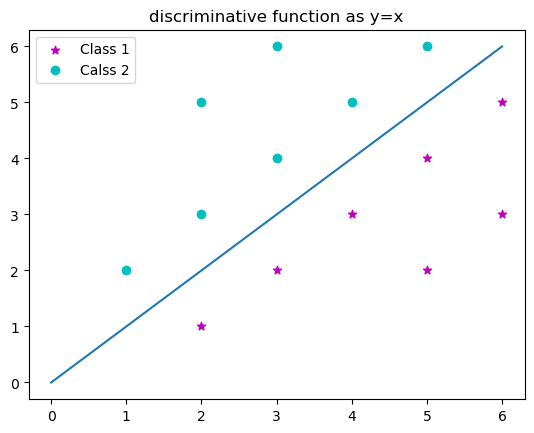

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(7), range(7))
plt.scatter(X_A[:7, 0], X_A[:7, 1], c='m', marker='*', label='Class 1')
plt.scatter(X_A[7:, 0], X_A[7:, 1], c='c', marker='o', label='Calss 2')
plt.legend(loc="best")
plt.title('discriminative function as y=x')
plt.show()

# Bayesian_A 

In [35]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_A, y_A)

BayesianRidge()

In [36]:
y_pred = clf.predict(X_A)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>0.5] = 1
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_A)

1.0

# Naive Bayes_A

In [38]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_A, y_A)

GaussianNB()

In [39]:
y_pred = clf.predict(X_A)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [40]:
accuracy_score(y_pred, y_A)

1.0

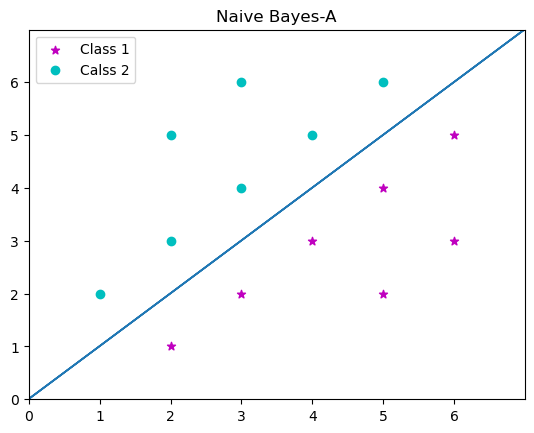

In [41]:
plt.scatter(X_A[:,0][y_A==0], X_A[:,1][y_A==0], c='m', marker='*', label='Class 1')
plt.scatter(X_A[:,0][y_A==1], X_A[:,1][y_A==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_A[:, 0].min() - 1, stop = X_A[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_A[:, 1].min() - 1, stop = X_A[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Naive Bayes-A')
plt.show()

# Linear regression_A (MSE (𝑙2  norm) and MAE (𝑙1  norm) )

In [44]:
from sklearn.model_selection import train_test_split
X_A_train, X_A_test, y_A_train, y_A_test=train_test_split (X_A, y_A, test_size=0.2)

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_A_train, y_A_train)

LinearRegression()

In [47]:
reg.score(X_A, y_A)

0.7044400270370897

In [48]:
reg.coef_

array([-0.28762542,  0.29598662])

In [49]:
reg.intercept_

0.5200668896321071

In [52]:
y_A_pred = reg.predict(X_A_test)

In [55]:
import numpy as np
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = round(sm.mean_squared_error(y_A_test, y_A_pred),2)
MAE = round(sm.mean_absolute_error(y_A_test, y_A_pred),2)

In [63]:
print("Mean absolute error Test=", round(sm.mean_absolute_error(y_A_test, y_A_pred), 2)) 
print("Mean squared error Test=", round(sm.mean_squared_error(y_A_test, y_A_pred), 2)) 
print('method is Linear regression  by %s  accuracy for test data'%((1-MSE)*100))
print('method is Linear regression  by %s  accuracy for test data'%((1-MAE)*100))

Mean absolute error Test= 0.34
Mean squared error Test= 0.13
method is Linear regression  by 87.0  accuracy for test data
method is Linear regression  by 65.99999999999999  accuracy for test data


# Logestic Regression_A

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_A, y_A)

LogisticRegression(random_state=0)

In [21]:
y_pred = clf.predict(X_A)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [22]:
accuracy_score(y_pred, y_A)

1.0

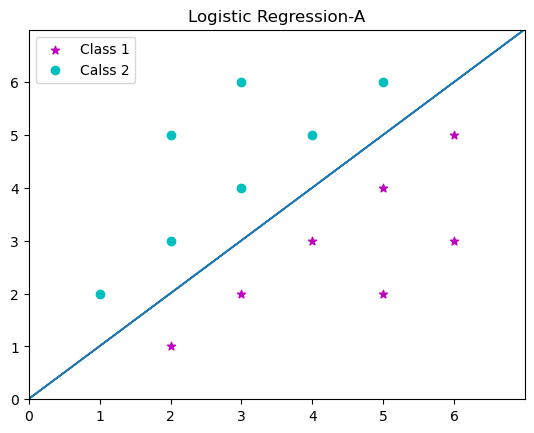

In [23]:
plt.scatter(X_A[:,0][y_A==0], X_A[:,1][y_A==0], c='m', marker='*', label='Class 1')
plt.scatter(X_A[:,0][y_A==1], X_A[:,1][y_A==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_A[:, 0].min() - 1, stop = X_A[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_A[:, 1].min() - 1, stop = X_A[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Logistic Regression-A')
plt.show()

# SVM_A

In [137]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='poly',degree=1)
clf.fit(X_A, y_A)

SVC(degree=1, kernel='poly')

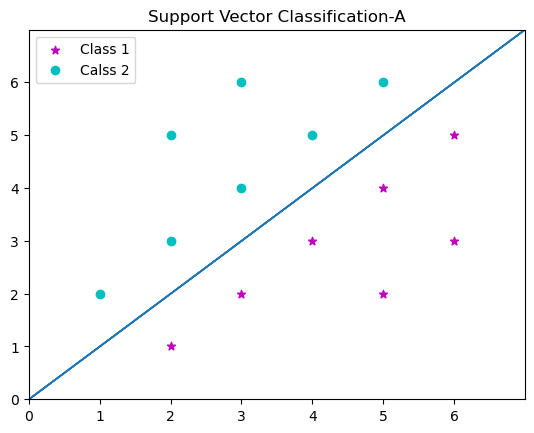

In [138]:
plt.scatter(X_A[:,0][y_A==0], X_A[:,1][y_A==0], c='m', marker='*', label='Class 1')
plt.scatter(X_A[:,0][y_A==1], X_A[:,1][y_A==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_A[:, 0].min() - 1, stop = X_A[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_A[:, 1].min() - 1, stop = X_A[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Support Vector Classification-A')
plt.show()

# Perceptron_A

In [26]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_A, y_A)

Perceptron()

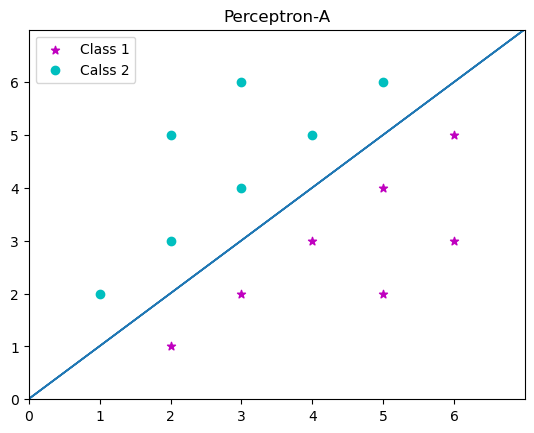

In [28]:
plt.scatter(X_A[:,0][y_A==0], X_A[:,1][y_A==0], c='m', marker='*', label='Class 1')
plt.scatter(X_A[:,0][y_A==1], X_A[:,1][y_A==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_A[:, 0].min() - 1, stop = X_A[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_A[:, 1].min() - 1, stop = X_A[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Perceptron-A')
plt.show()

**B)** Now add the following samples to datapoint which are related to C1 class. Try to analyze the previous question using this new dataset. Explain and emphasize how each method behaves on the original dataset and the new dataset.

In [65]:
X_B = np.vstack([X_A, [[8, 2], [10, 4]]])
y_B = np.hstack([y_A, [0, 0]])

# Bayesian_B 

In [66]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_B, y_B)

BayesianRidge()

In [67]:
y_pred = clf.predict(X_B)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>0.5] = 1
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_B)

1.0

# Naive Bayes_B

In [69]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_B, y_B)

GaussianNB()

In [70]:
y_pred = clf.predict(X_B)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [71]:
accuracy_score(y_pred, y_B)

0.9375

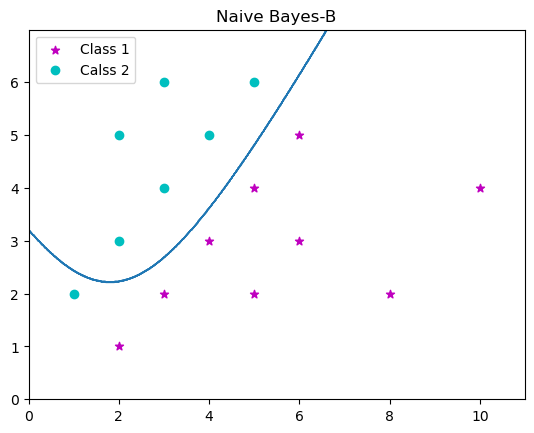

In [72]:
plt.scatter(X_B[:,0][y_B==0], X_B[:,1][y_B==0], c='m', marker='*', label='Class 1')
plt.scatter(X_B[:,0][y_B==1], X_B[:,1][y_B==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_B[:, 0].min() - 1, stop = X_B[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_B[:, 1].min() - 1, stop = X_B[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Naive Bayes-B')
plt.show()

# Linear regression_B (MSE (𝑙2  norm) and MAE (𝑙1  norm) )

In [73]:
from sklearn.model_selection import train_test_split
X_B_train, X_B_test, y_B_train, y_B_test=train_test_split (X_B, y_B, test_size=0.2)

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_B_train, y_B_train)

LinearRegression()

In [75]:
reg.score(X_B, y_B)

0.6243851187648831

In [76]:
reg.coef_

array([-0.15888478,  0.18777293])

In [77]:
reg.intercept_

0.44675848169297977

In [79]:
y_B_pred = reg.predict(X_B_test)

In [80]:
import numpy as np
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = round(sm.mean_squared_error(y_B_test, y_B_pred),2)
MAE = round(sm.mean_absolute_error(y_B_test, y_B_pred),2)

In [81]:
print("Mean absolute error Test=", round(sm.mean_absolute_error(y_B_test, y_B_pred), 2)) 
print("Mean squared error Test=", round(sm.mean_squared_error(y_B_test, y_B_pred), 2)) 
print('method is Linear regression  by %s  accuracy for test data'%((1-MSE)*100))
print('method is Linear regression  by %s  accuracy for test data'%((1-MAE)*100))

Mean absolute error Test= 0.28
Mean squared error Test= 0.09
method is Linear regression  by 91.0  accuracy for test data
method is Linear regression  by 72.0  accuracy for test data


# Logestic Regression_B

In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_B, y_B)

LogisticRegression(random_state=0)

In [83]:
y_pred = clf.predict(X_B)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [84]:
accuracy_score(y_pred, y_B)

1.0

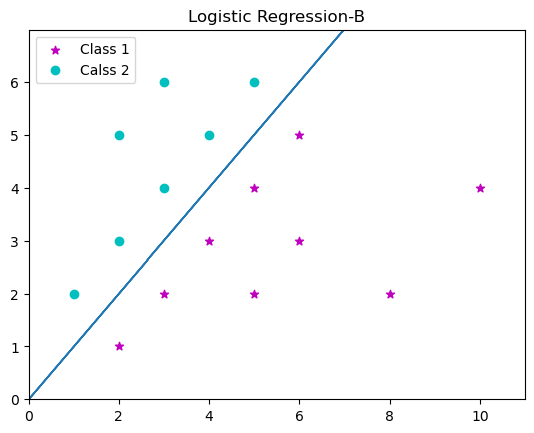

In [87]:
plt.scatter(X_B[:,0][y_B==0], X_B[:,1][y_B==0], c='m', marker='*', label='Class 1')
plt.scatter(X_B[:,0][y_B==1], X_B[:,1][y_B==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_B[:, 0].min() - 1, stop = X_B[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_B[:, 1].min() - 1, stop = X_B[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Logistic Regression-B')
plt.show()

# SVM_B

In [135]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='poly',degree=1)
clf.fit(X_B, y_B)

SVC(degree=1, kernel='poly')

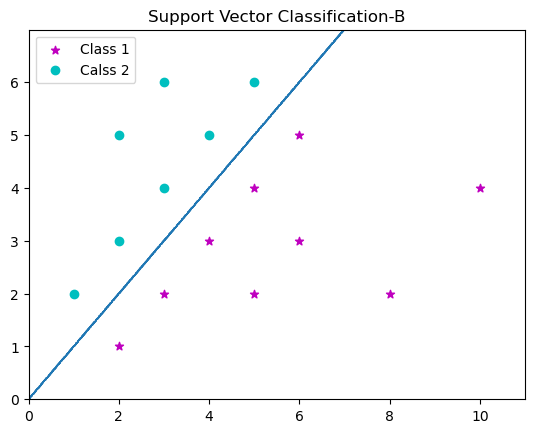

In [136]:
plt.scatter(X_B[:,0][y_B==0], X_B[:,1][y_B==0], c='m', marker='*', label='Class 1')
plt.scatter(X_B[:,0][y_B==1], X_B[:,1][y_B==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_B[:, 0].min() - 1, stop = X_B[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_B[:, 1].min() - 1, stop = X_B[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Support Vector Classification-B')
plt.show()

# Perceptron_B

In [90]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_B, y_B)

Perceptron()

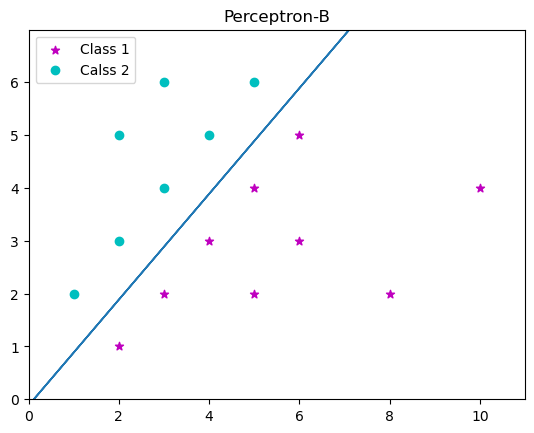

In [91]:
plt.scatter(X_B[:,0][y_B==0], X_B[:,1][y_B==0], c='m', marker='*', label='Class 1')
plt.scatter(X_B[:,0][y_B==1], X_B[:,1][y_B==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_B[:, 0].min() - 1, stop = X_B[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_B[:, 1].min() - 1, stop = X_B[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Perceptron-B')
plt.show()

**C)** Now add the following datapoint to the  dataset in previous question. Same as before, try to analyze the performance you got for each method. Also obtain their discriminative function as well. Compare and analyze the performances overall when considering different datasets and various methods.

In [92]:
X_C = np.vstack([X_B, [[2, 7], [3, 9]]])
y_C = np.hstack([y_B, [0, 0]])

# Bayesian_C 

In [93]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_C, y_C)

BayesianRidge()

In [94]:
y_pred = clf.predict(X_C)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>0.5] = 1
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1.])

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_C)

0.6111111111111112

# Naive Bayes_C

In [96]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_C, y_C)

GaussianNB()

In [97]:
y_pred = clf.predict(X_C)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [98]:
accuracy_score(y_pred, y_C)

0.8333333333333334

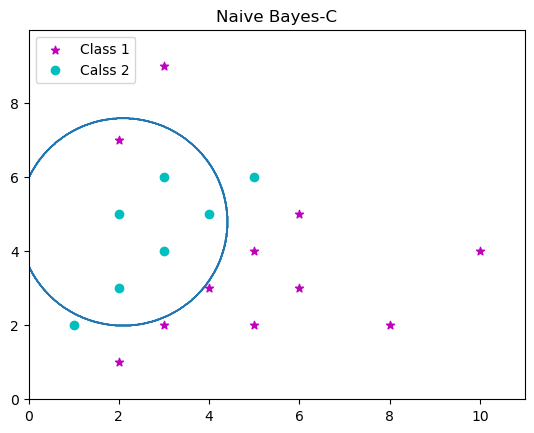

In [99]:
plt.scatter(X_C[:,0][y_C==0], X_C[:,1][y_C==0], c='m', marker='*', label='Class 1')
plt.scatter(X_C[:,0][y_C==1], X_C[:,1][y_C==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_C[:, 0].min() - 1, stop = X_C[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_C[:, 1].min() - 1, stop = X_C[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Naive Bayes-C')
plt.show()

# Linear regression_C (MSE (𝑙2  norm) and MAE (𝑙1  norm) )

In [100]:
from sklearn.model_selection import train_test_split
X_C_train, X_C_test, y_C_train, y_C_test=train_test_split (X_C, y_C, test_size=0.2)

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_C_train, y_C_train)

LinearRegression()

In [102]:
reg.score(X_C, y_C)

0.19563780990817026

In [103]:
reg.coef_

array([-0.10817216,  0.01731519])

In [104]:
reg.intercept_

0.7224600565705989

In [105]:
y_C_pred = reg.predict(X_C_test)

In [106]:
import numpy as np
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = round(sm.mean_squared_error(y_C_test, y_C_pred),2)
MAE = round(sm.mean_absolute_error(y_C_test, y_C_pred),2)

In [107]:
print("Mean absolute error Test=", round(sm.mean_absolute_error(y_C_test, y_C_pred), 2)) 
print("Mean squared error Test=", round(sm.mean_squared_error(y_C_test, y_C_pred), 2)) 
print('method is Linear regression  by %s  accuracy for test data'%((1-MSE)*100))
print('method is Linear regression  by %s  accuracy for test data'%((1-MAE)*100))

Mean absolute error Test= 0.26
Mean squared error Test= 0.09
method is Linear regression  by 91.0  accuracy for test data
method is Linear regression  by 74.0  accuracy for test data


# Logestic Regression_C

In [108]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_C, y_C)

LogisticRegression(random_state=0)

In [109]:
y_pred = clf.predict(X_C)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [110]:
accuracy_score(y_pred, y_C)

0.6666666666666666

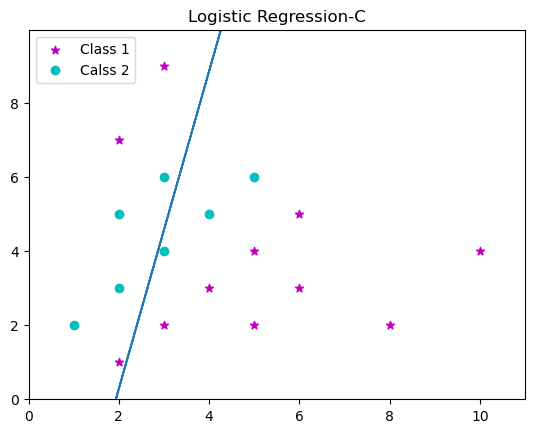

In [111]:
plt.scatter(X_C[:,0][y_C==0], X_C[:,1][y_C==0], c='m', marker='*', label='Class 1')
plt.scatter(X_C[:,0][y_C==1], X_C[:,1][y_C==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_C[:, 0].min() - 1, stop = X_C[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_C[:, 1].min() - 1, stop = X_C[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Logistic Regression-C')
plt.show()

# SVM_C

In [133]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='poly',degree=1)
clf.fit(X_C, y_C)

SVC(degree=1, kernel='poly')

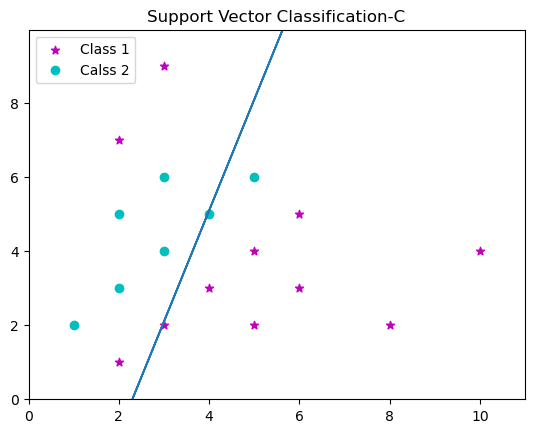

In [134]:
plt.scatter(X_C[:,0][y_C==0], X_C[:,1][y_C==0], c='m', marker='*', label='Class 1')
plt.scatter(X_C[:,0][y_C==1], X_C[:,1][y_C==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_C[:, 0].min() - 1, stop = X_C[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_C[:, 1].min() - 1, stop = X_C[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Support Vector Classification-C')
plt.show()

# Perceptron_C

In [116]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_C, y_C)

Perceptron()

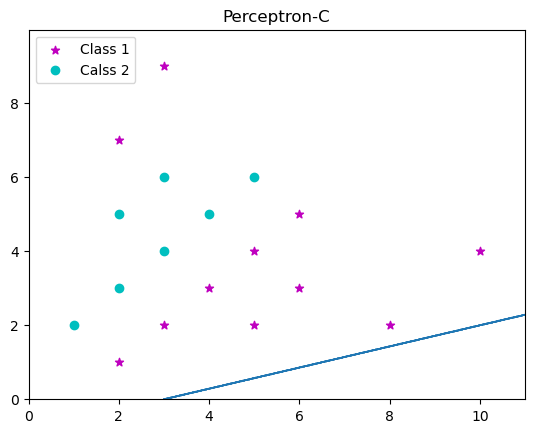

In [117]:
plt.scatter(X_C[:,0][y_C==0], X_C[:,1][y_C==0], c='m', marker='*', label='Class 1')
plt.scatter(X_C[:,0][y_C==1], X_C[:,1][y_C==1], c='c', marker='o', label='Calss 2')

X1, X2 = np.meshgrid(np.arange(start = X_C[:, 0].min() - 1, stop = X_C[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_C[:, 1].min() - 1, stop = X_C[:, 1].max() + 1, step = 0.01))
  
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, colors = 'tab:blue', linewidths = 1)
plt.legend(loc="upper left")
plt.title('Perceptron-C')
plt.show()